### Se pide, usando regresión lineal:

Dibujar con una línea la relación que hay entre la altura y la edad de los alumnos de esta clase: 

- ¿Es una buena técnica para este tipo de problemas? ¿Por qué? 
- ¿Qué error se comete? Calcula los errores que está cometiendo tu modelo uno a uno (lo tienes que calcular tú con python). Aparte, usa el MSE y el RMSE. ¿Alguno es mejor para este problema?
- Representa la matriz de correlación, ¿los datos están correlacionados?

In [95]:
lista_alumnos = [("Leonardo S", 24, 1.82), 
                 ("Piero T", 25, 1.71), 
                 ("Marta B", 35, 1.66), 
                 ("Silvia P", 37, 1.63), 
                 ("Faro Z", 29, 1.90), 
                 ("Miguel N", 27, 1.80), 
                 ("Alejandro M", 28, 1.70), 
                 ("Cristina M", 32, 1.60), 
                 ("Francisco P", 36, 1.74), 
                 ("Jorge D", 45, 1.72), 
                 ("Jesús L", 41, 1.65), 
                 ("Marta G", 30, 1.65), 
                 ("Jennifer S", 40, 1.60), 
                 ("Diego I", 39, 1.80), 
                 ("Antonio C", 23, 1.77), 
                 ("Juan M", 32, 1.75), 
                 ("David S", 27, 1.70), 
                 ("Antonio J", 34, 1.80), 
                 ("Carlos H", 27, 1.77), 
                 ("Erik U", 28, 1.70), 
                 ("Marcos L", 35, 1.80)] 

In [97]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

1. Crea un dataframe

In [100]:
df = pd.DataFrame(data = lista_alumnos, columns= ['Nombre', 'Edad', 'Altura'])

2. Realiza un breve análisis exploratorio de los datos

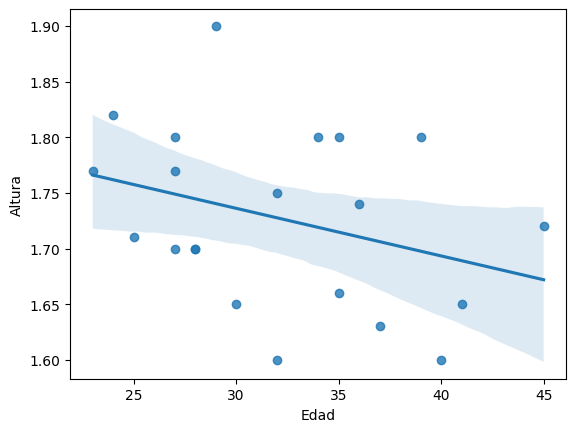

In [109]:
sns.regplot(data= df, x= df['Edad'], y= df['Altura']);

C:\Users\migue\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


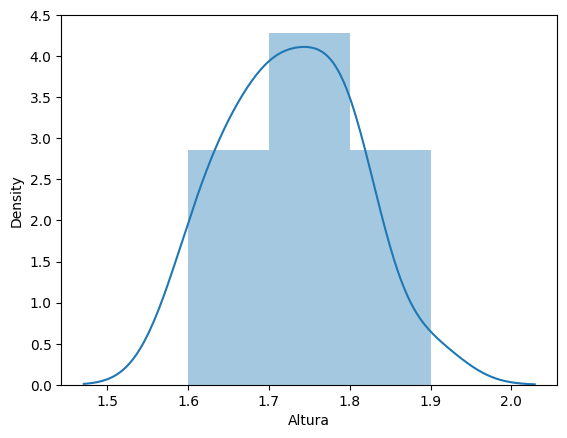

In [110]:
sns.distplot(df['Altura']);

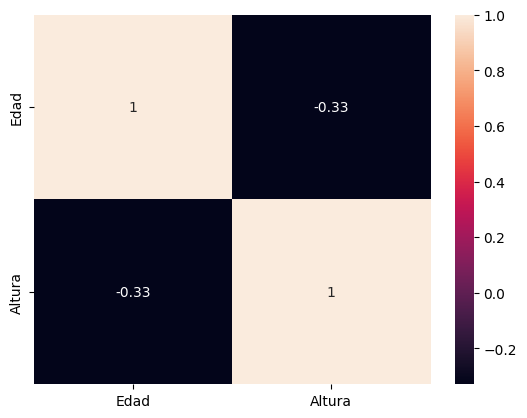

In [111]:
sns.heatmap(df.corr(), annot= True);

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Nombre  21 non-null     object 
 1   Edad    21 non-null     int64  
 2   Altura  21 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 632.0+ bytes


In [108]:
df.describe()

,Edad,Altura
count,21.000000,21.000000
mean,32.095238,1.727143
std,6.081980,0.079003
min,23.000000,1.600000
25%,27.000000,1.660000
50%,32.000000,1.720000
75%,36.000000,1.800000
max,45.000000,1.900000


3. Divide el dataset para el entrenamiento

In [112]:
from sklearn.model_selection import train_test_split

In [141]:
X = df[['Edad']]
Y = df['Altura']

In [142]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.20, random_state= 42)

In [143]:
X_train

,Edad
5,27
11,30
3,37
18,27
16,27
13,39
2,35
9,45
20,35
4,29


4. Entrena tu modelo

In [144]:
from sklearn.linear_model import LinearRegression

In [146]:
linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)

LinearRegression()

5. Obtén predicciones con el test

In [147]:
predictions = linear_model.predict(X_test)

In [148]:
df_errors = pd.DataFrame({'Actual_values': Y_test, 'Predictions': predictions})

In [150]:
df_errors['Errors'] = df_errors['Actual_values'] - df_errors['Predictions']

In [151]:
df_errors

,Actual_values,Predictions,Errors
0,1.82,1.753478,0.066522
17,1.80,1.709906,0.090094
15,1.75,1.718621,0.031379
1,1.71,1.749121,-0.039121
8,1.74,1.701192,0.038808


C:\Users\migue\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='Errors', ylabel='Density'>

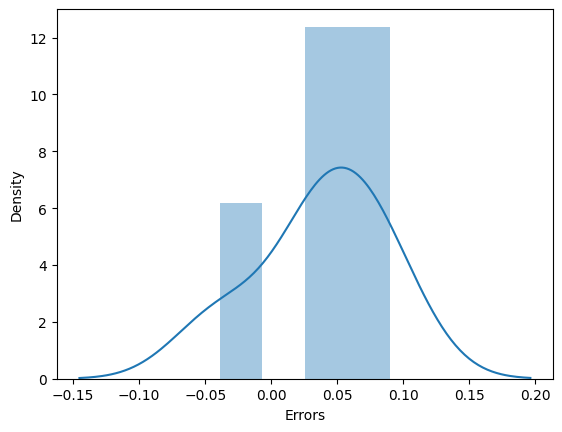

In [153]:
sns.distplot(df_errors['Errors'])

6. Evalúa tu modelo

In [154]:
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error

In [158]:
mean_absolute_error(Y_test, predictions)

0.05318486080700664

7. Representa tus predicciones en una gráfica.

In [164]:
X_test['Edad']

0     24
17    34
15    32
1     25
8     36
Name: Edad, dtype: int64

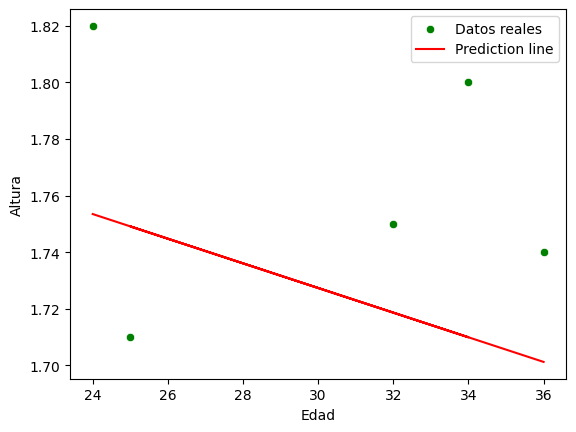

In [167]:
sns.scatterplot(x = X_test['Edad'], y = Y_test, label = 'Datos reales', color = 'g')
plt.plot(X_test, predictions, label = 'Prediction line', color = 'r' )
plt.legend();